In [150]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

### 1. train/test split 비율

In [154]:
data = """
Split   Accuracy    Precision   Recall  F1
X(3.5:1)  75.24   63.64   20.4    30.9
2:1   72.26   48.49   36.1    41.39
1.8:1   74.45   53.99   39.46   45.6
1.6:1   73.78   51.84   47.31   49.47
1.4:1   72.38   49.2    55.38   52.11
1.2:1   71.17   47.47   58.97   52.6
1:1   67.03   43.3    69.51   53.36
"""

# 데이터를 DataFrame으로 변환
df = pd.read_csv(StringIO(data), delim_whitespace=True)

# 결과 출력
df

,Split,Accuracy,Precision,Recall,F1
0,X(3.5:1),75.24,63.64,20.40,30.90
1,2:1,72.26,48.49,36.10,41.39
2,1.8:1,74.45,53.99,39.46,45.60
3,1.6:1,73.78,51.84,47.31,49.47
4,1.4:1,72.38,49.20,55.38,52.11
5,1.2:1,71.17,47.47,58.97,52.60
6,1:1,67.03,43.30,69.51,53.36


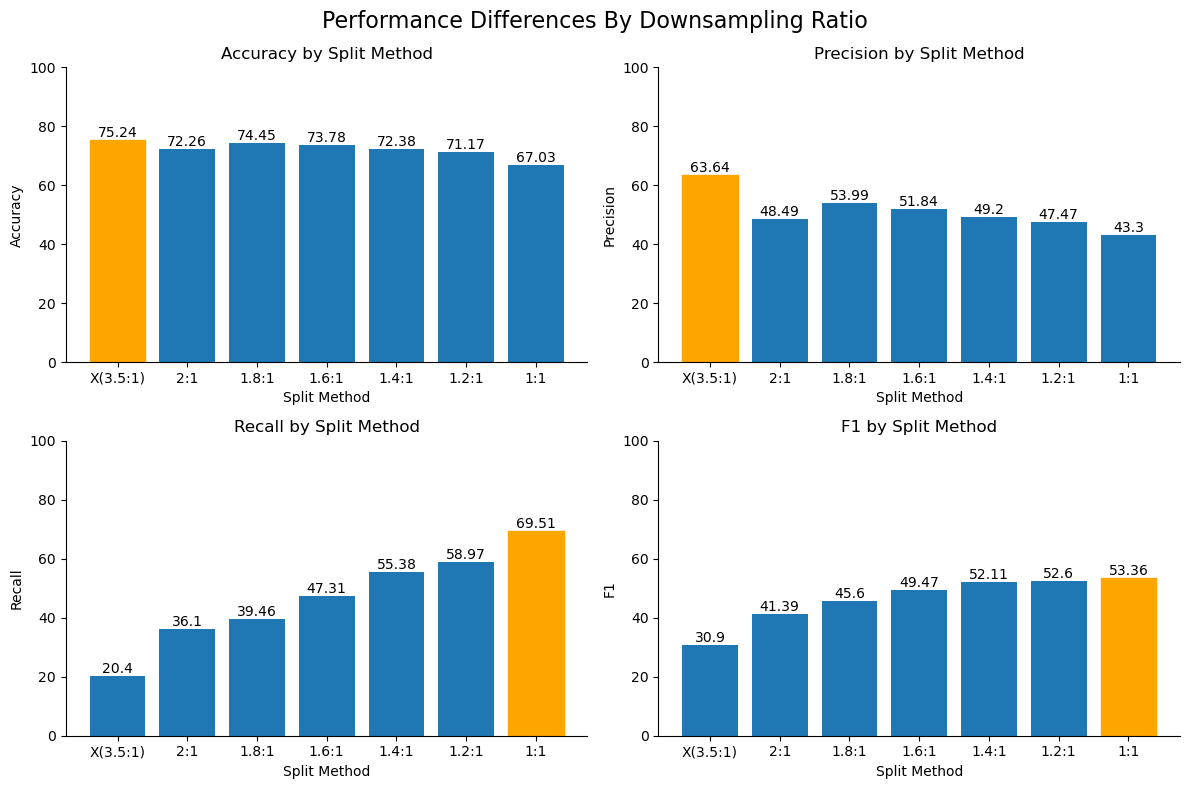

In [155]:
# 지표 컬럼 선택
metrics = df.columns[1:]

# 지표 데이터 추출
data_values = df[metrics].values

# Split 컬럼 추출
split_methods = df['Split'].values

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Performance Differences By Downsampling Ratio', fontsize=16)  # 전체 subplot 제목
axs = axs.ravel()

for i, metric in enumerate(metrics):
    bars = axs[i].bar(split_methods, data_values[:, i])
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Split Method")
    axs[i].set_xlabel("Split Method")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

    max_height = max(data_values[:, i])
    for bar in bars:
        yval = bar.get_height()
        if yval == max_height:
            bar.set_color('orange')  # 가장 높은 막대의 색깔 변경
        axs[i].text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2. OSI vs Baseline Cut

In [157]:
# 데이터를 DataFrame으로 변환
data = """
Value   Accuracy    Precision   Recall  F1
Mean    65.2825   41.465   67.77    51.44
Baseline_Cut   50   50.1   27.1   35.2
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Value 열을 인덱스로 설정
df.set_index('Value', inplace=True)
df

,Accuracy,Precision,Recall,F1
Value,,,,
Mean,65.2825,41.465,67.77,51.44
Baseline_Cut,50.0000,50.100,27.10,35.20


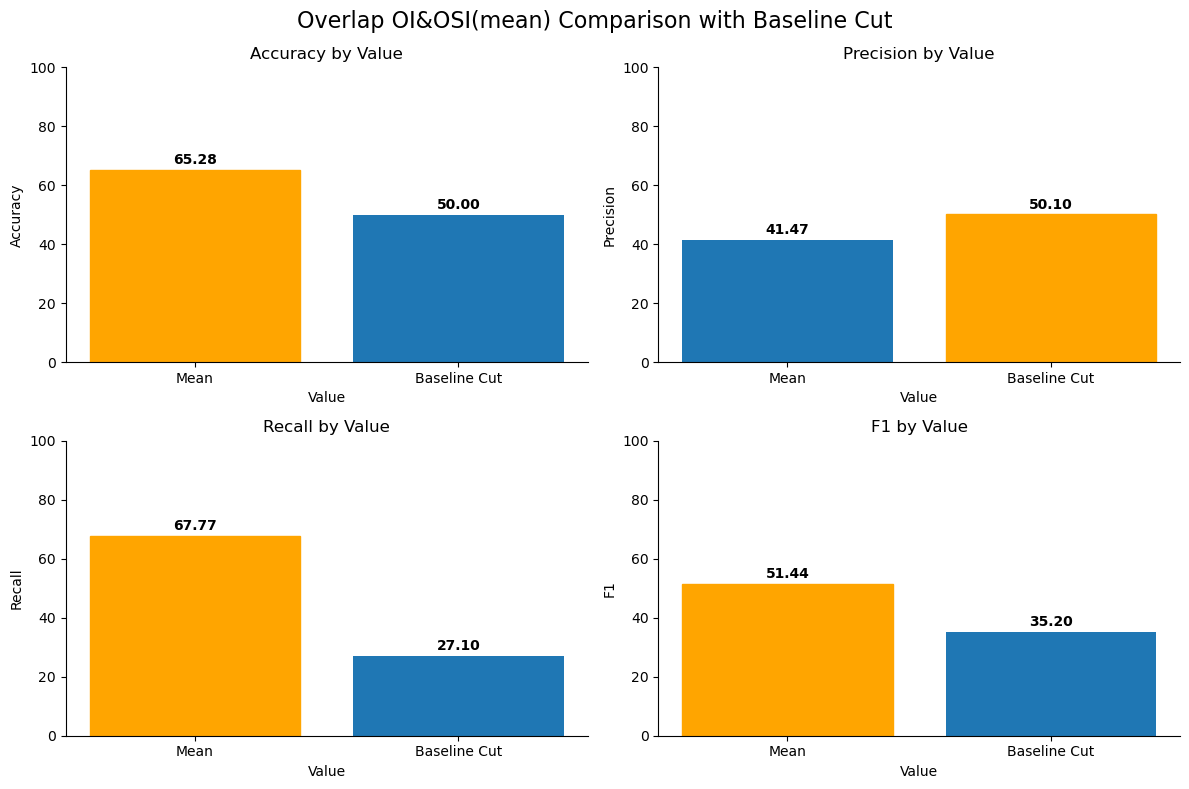

In [158]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Overlap OI&OSI(mean) Comparison with Baseline Cut', fontsize=16)  # 전체 subplot 제목
axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars_mean = df.loc['Mean', [metric]].values[0]
    bars_baseline = df.loc['Baseline_Cut', [metric]].values[0]
    
    axs[i].bar(['Mean', 'Baseline Cut'], [bars_mean, bars_baseline])
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Value")
    axs[i].set_xlabel("Value")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거
    
    # 큰 값의 색깔 변경
    if bars_mean > bars_baseline:
        axs[i].get_children()[0].set_color('orange')
    else:
        axs[i].get_children()[1].set_color('orange')
    
    # 박스 위에 값을 표시
    axs[i].text(0, bars_mean + 2, f'{bars_mean:.2f}', ha='center', color='black', fontweight='bold')
    axs[i].text(1, bars_baseline + 2, f'{bars_baseline:.2f}', ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

### 3. Overlap OSI 결측치&모델별 성능 차이

In [160]:
# 데이터를 DataFrame으로 변환
data = """
Model   Accuracy    Precision   Recall  F1
XGB    67.03   43.3   69.51    53.36
TabNet 54.62   34.01   71.52   46.1
Decision_Tree   59.61   36.2   64.13   46.28
Logistic_Regression  65.63   40.51   56.95   47.34
SVM    67.21   41.04   47.76   44.15
"""

# DataFrame으로 변환
df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Model 열을 인덱스로 설정
df.set_index('Model', inplace=True)
df

,Accuracy,Precision,Recall,F1
Model,,,,
XGB,67.03,43.30,69.51,53.36
TabNet,54.62,34.01,71.52,46.10
Decision_Tree,59.61,36.20,64.13,46.28
Logistic_Regression,65.63,40.51,56.95,47.34
SVM,67.21,41.04,47.76,44.15


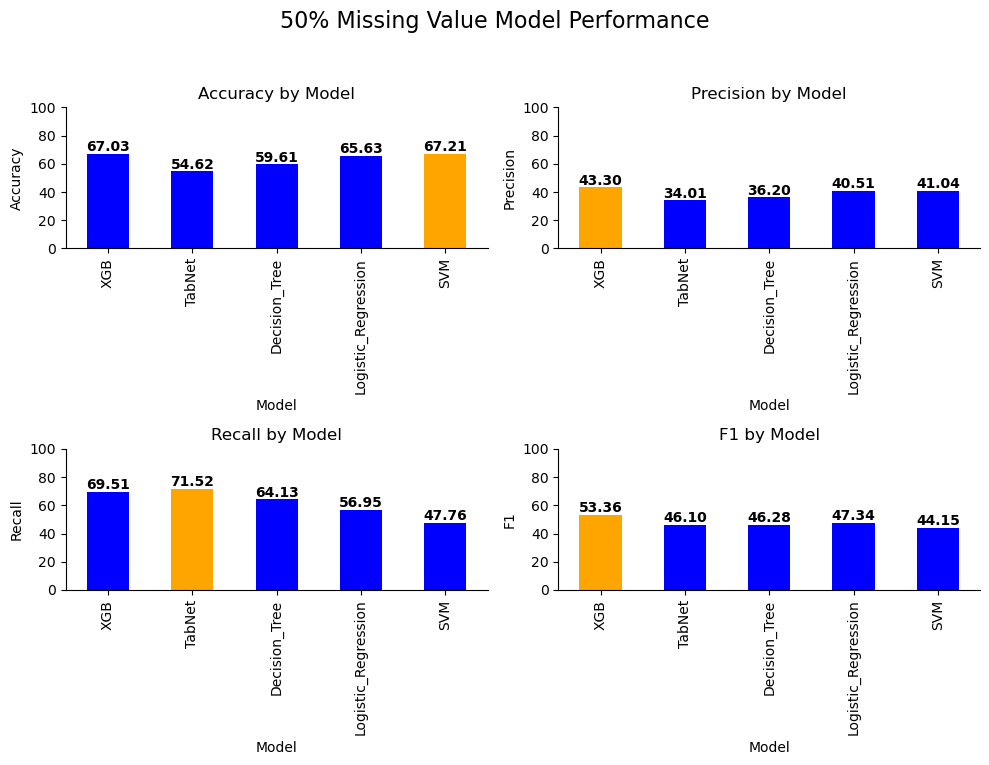

In [161]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('50% Missing Value Model Performance', fontsize=16)  # 전체 subplot 제목

axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars = df[metric]
    max_bar = bars.max()
    
    bars.plot(kind='bar', ax=axs[i], color=[('orange' if x == max_bar else 'blue') for x in bars])
    
    for j, bar in enumerate(bars):
        axs[i].text(j, bar + 2, f'{bar:.2f}', ha='center', color='black', fontweight='bold')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Model")
    axs[i].set_xlabel("Model")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목이 subplot을 가리지 않도록 조절
plt.show()

In [162]:
# 데이터를 DataFrame으로 변환
data = """
Model   Accuracy    Precision   Recall  F1
XGB    65.27   41.08   64.57    50.22
TabNet 62.35   35.8   48.88   41.33
Decision_Tree   59.61   36.2   64.13   46.28
Logistic_Regression  65.63   41.13   61.88   49.42
SVM    63.56   37.72   52.69   43.97
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Model 열을 인덱스로 설정
df.set_index('Model', inplace=True)
df

,Accuracy,Precision,Recall,F1
Model,,,,
XGB,65.27,41.08,64.57,50.22
TabNet,62.35,35.80,48.88,41.33
Decision_Tree,59.61,36.20,64.13,46.28
Logistic_Regression,65.63,41.13,61.88,49.42
SVM,63.56,37.72,52.69,43.97


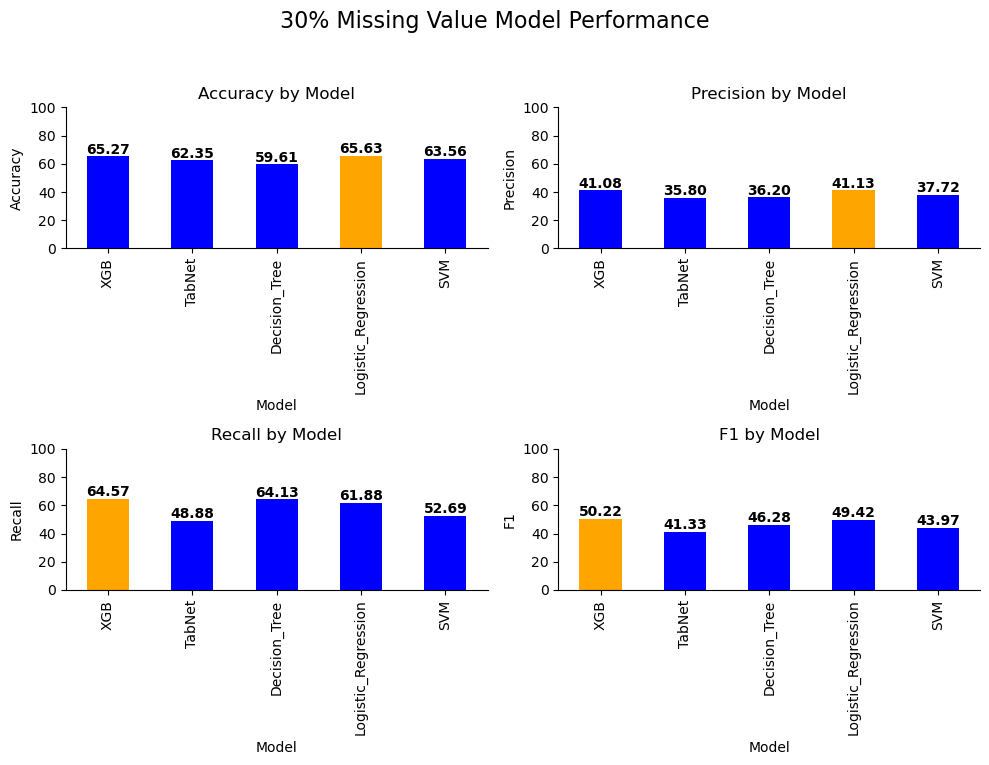

In [163]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('30% Missing Value Model Performance', fontsize=16)  # 전체 subplot 제목

axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars = df[metric]
    max_bar = bars.max()
    
    bars.plot(kind='bar', ax=axs[i], color=[('orange' if x == max_bar else 'blue') for x in bars])
    
    for j, bar in enumerate(bars):
        axs[i].text(j, bar + 2, f'{bar:.2f}', ha='center', color='black', fontweight='bold')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Model")
    axs[i].set_xlabel("Model")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목이 subplot을 가리지 않도록 조절
plt.show()


In [164]:
# 데이터를 DataFrame으로 변환
data = """
Model   Accuracy    Precision   Recall  F1
XGB    64.84   41.01   67.49    51.02
TabNet 63.93   39.33   60.76   47.75
Decision_Tree   58.45   36.3   70.4   47.9
Logistic_Regression  64.36   40.25   64.8   49.66
SVM    64.17   40.4   67.49   50.55
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Model 열을 인덱스로 설정
df.set_index('Model', inplace=True)
df

,Accuracy,Precision,Recall,F1
Model,,,,
XGB,64.84,41.01,67.49,51.02
TabNet,63.93,39.33,60.76,47.75
Decision_Tree,58.45,36.30,70.40,47.90
Logistic_Regression,64.36,40.25,64.80,49.66
SVM,64.17,40.40,67.49,50.55


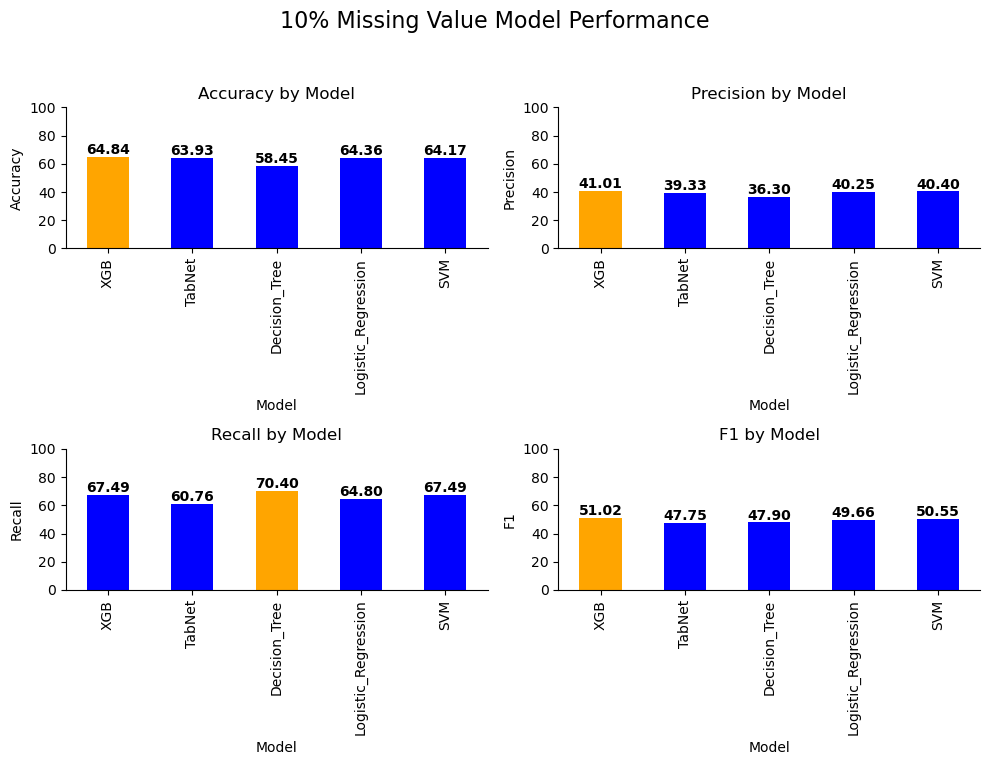

In [165]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('10% Missing Value Model Performance', fontsize=16)  # 전체 subplot 제목

axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars = df[metric]
    max_bar = bars.max()
    
    bars.plot(kind='bar', ax=axs[i], color=[('orange' if x == max_bar else 'blue') for x in bars])
    
    for j, bar in enumerate(bars):
        axs[i].text(j, bar + 2, f'{bar:.2f}', ha='center', color='black', fontweight='bold')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Model")
    axs[i].set_xlabel("Model")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목이 subplot을 가리지 않도록 조절
plt.show()


In [168]:
# 데이터를 DataFrame으로 변환
data = """
Model   Accuracy    Precision   Recall  F1
XGB    63.99   40.47   69.51    51.16
TabNet 60.58   37.47   67.71   48.24
Decision_Tree   58.70   36.62   71.52   48.44
Logistic_Regression  64.23   40.19   65.25   49.74
SVM    62.71   39.39   69.51   50.28
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Model 열을 인덱스로 설정
df.set_index('Model', inplace=True)
df

,Accuracy,Precision,Recall,F1
Model,,,,
XGB,63.99,40.47,69.51,51.16
TabNet,60.58,37.47,67.71,48.24
Decision_Tree,58.70,36.62,71.52,48.44
Logistic_Regression,64.23,40.19,65.25,49.74
SVM,62.71,39.39,69.51,50.28


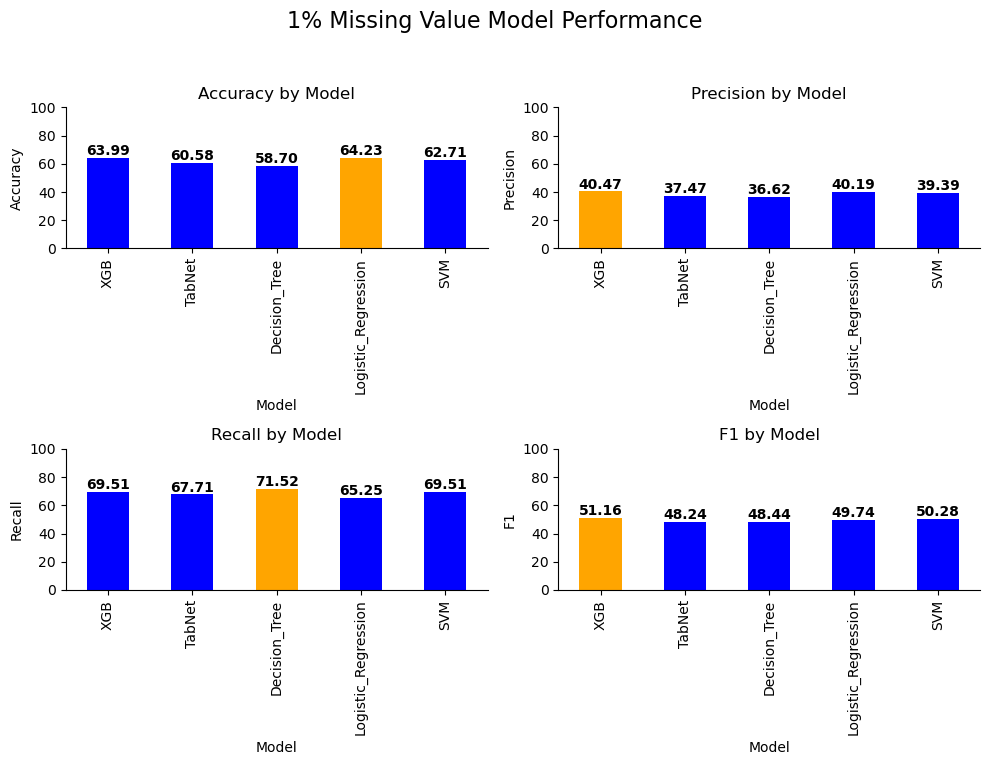

In [169]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('1% Missing Value Model Performance', fontsize=16)  # 전체 subplot 제목

axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars = df[metric]
    max_bar = bars.max()
    
    bars.plot(kind='bar', ax=axs[i], color=[('orange' if x == max_bar else 'blue') for x in bars])
    
    for j, bar in enumerate(bars):
        axs[i].text(j, bar + 2, f'{bar:.2f}', ha='center', color='black', fontweight='bold')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Model")
    axs[i].set_xlabel("Model")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목이 subplot을 가리지 않도록 조절
plt.show()

### 4. Overlap OSI 결측치&모델별 성능 차이 한번에

In [173]:
# 데이터를 DataFrame으로 변환
data = """
Missing_Value	Model	Accuracy	Precision	Recall	F1
50%	XGB	67.03	43.3	69.51	53.36
50%	TabNet	54.62	34.01	71.52	46.1
50%	Decision_Tree	59.61	36.2	64.13	46.28
50%	Logistic_Regression	65.63	40.51	56.95	47.34
50%	SVM	67.21	41.04	47.76	44.15
30%	XGB	65.27	41.08	64.57	50.22
30%	TabNet	62.35	35.8	48.88	41.33
30%	Decision_Tree	59.61	36.2	64.13	46.28
30%	Logistic_Regression	65.63	41.13	61.88	49.42
30%	SVM	63.56	37.72	52.69	43.97
10%	XGB	64.84	41.01	67.49	51.02
10%	TabNet	63.93	39.33	60.76	47.75
10%	Decision_Tree	58.45	36.3	70.4	47.9
10%	Logistic_Regression	64.36	40.25	64.8	49.66
10%	SVM	64.17	40.4	67.49	50.55
1%	XGB	63.99	40.47	69.51	51.16
1%	TabNet	60.58	37.47	67.71	48.24
1%	Decision_Tree	58.7	36.62	71.52	48.44
1%	Logistic_Regression	64.23	40.19	65.25	49.74
1%	SVM	62.71	39.39	69.51	50.28
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# 각 모델별로 평균 값을 계산하여 missing value 열에 추가
df_mean = df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1']].mean().reset_index()
df_mean['Missing_Value'] = 'mean'
df = pd.concat([df, df_mean], ignore_index=True)
df

,Missing_Value,Model,Accuracy,Precision,Recall,F1
0,50%,XGB,67.0300,43.3000,69.5100,53.3600
1,50%,TabNet,54.6200,34.0100,71.5200,46.1000
2,50%,Decision_Tree,59.6100,36.2000,64.1300,46.2800
3,50%,Logistic_Regression,65.6300,40.5100,56.9500,47.3400
4,50%,SVM,67.2100,41.0400,47.7600,44.1500
5,30%,XGB,65.2700,41.0800,64.5700,50.2200
6,30%,TabNet,62.3500,35.8000,48.8800,41.3300
7,30%,Decision_Tree,59.6100,36.2000,64.1300,46.2800
8,30%,Logistic_Regression,65.6300,41.1300,61.8800,49.4200
9,30%,SVM,63.5600,37.7200,52.6900,43.9700


In [185]:
import pandas as pd

data = """
Missing_Value	Model	Accuracy	Precision	Recall	F1
50%	XGB	67.0300	43.3000	69.5100	53.3600
50%	TabNet	54.6200	34.0100	71.5200	46.1000
50%	Decision_Tree	59.6100	36.2000	64.1300	46.2800
50%	Logistic_Regression	65.6300	40.5100	56.9500	47.3400
50%	SVM	67.2100	41.0400	47.7600	44.1500
30%	XGB	65.2700	41.0800	64.5700	50.2200
30%	TabNet	62.3500	35.8000	48.8800	41.3300
30%	Decision_Tree	59.6100	36.2000	64.1300	46.2800
30%	Logistic_Regression	65.6300	41.1300	61.8800	49.4200
30%	SVM	63.5600	37.7200	52.6900	43.9700
10%	XGB	64.8400	41.0100	67.4900	51.0200
10%	TabNet	63.9300	39.3300	60.7600	47.7500
10%	Decision_Tree	58.4500	36.3000	70.4000	47.9000
10%	Logistic_Regression	64.3600	40.2500	64.8000	49.6600
10%	SVM	64.1700	40.4000	67.4900	50.5500
1%	XGB	63.9900	40.4700	69.5100	51.1600
1%	TabNet	60.5800	37.4700	67.7100	48.2400
1%	Decision_Tree	58.7000	36.6200	71.5200	48.4400
1%	Logistic_Regression	64.2300	40.1900	65.2500	49.7400
1%	SVM	62.7100	39.3900	69.5100	50.2800
mean	XGB	65.2825	41.4650	67.7700	51.4400
mean	TabNet	60.3700	36.6525	62.2175	45.8550
mean	Decision_Tree	59.0925	36.3300	67.5450	47.2250
mean	Logistic_Regression	64.9625	40.5200	62.2200	49.0400
mean	SVM	64.4125	39.6375	59.3625	47.2375
"""

# 데이터를 DataFrame으로 변환
df = pd.read_csv(StringIO(data), delim_whitespace=True)
df

,Missing_Value,Model,Accuracy,Precision,Recall,F1
0,50%,XGB,67.0300,43.3000,69.5100,53.3600
1,50%,TabNet,54.6200,34.0100,71.5200,46.1000
2,50%,Decision_Tree,59.6100,36.2000,64.1300,46.2800
3,50%,Logistic_Regression,65.6300,40.5100,56.9500,47.3400
4,50%,SVM,67.2100,41.0400,47.7600,44.1500
5,30%,XGB,65.2700,41.0800,64.5700,50.2200
6,30%,TabNet,62.3500,35.8000,48.8800,41.3300
7,30%,Decision_Tree,59.6100,36.2000,64.1300,46.2800
8,30%,Logistic_Regression,65.6300,41.1300,61.8800,49.4200
9,30%,SVM,63.5600,37.7200,52.6900,43.9700


/tmp/ipykernel_312387/322663767.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_312387/322663767.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_312387/322663767.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_312387/322663767.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)


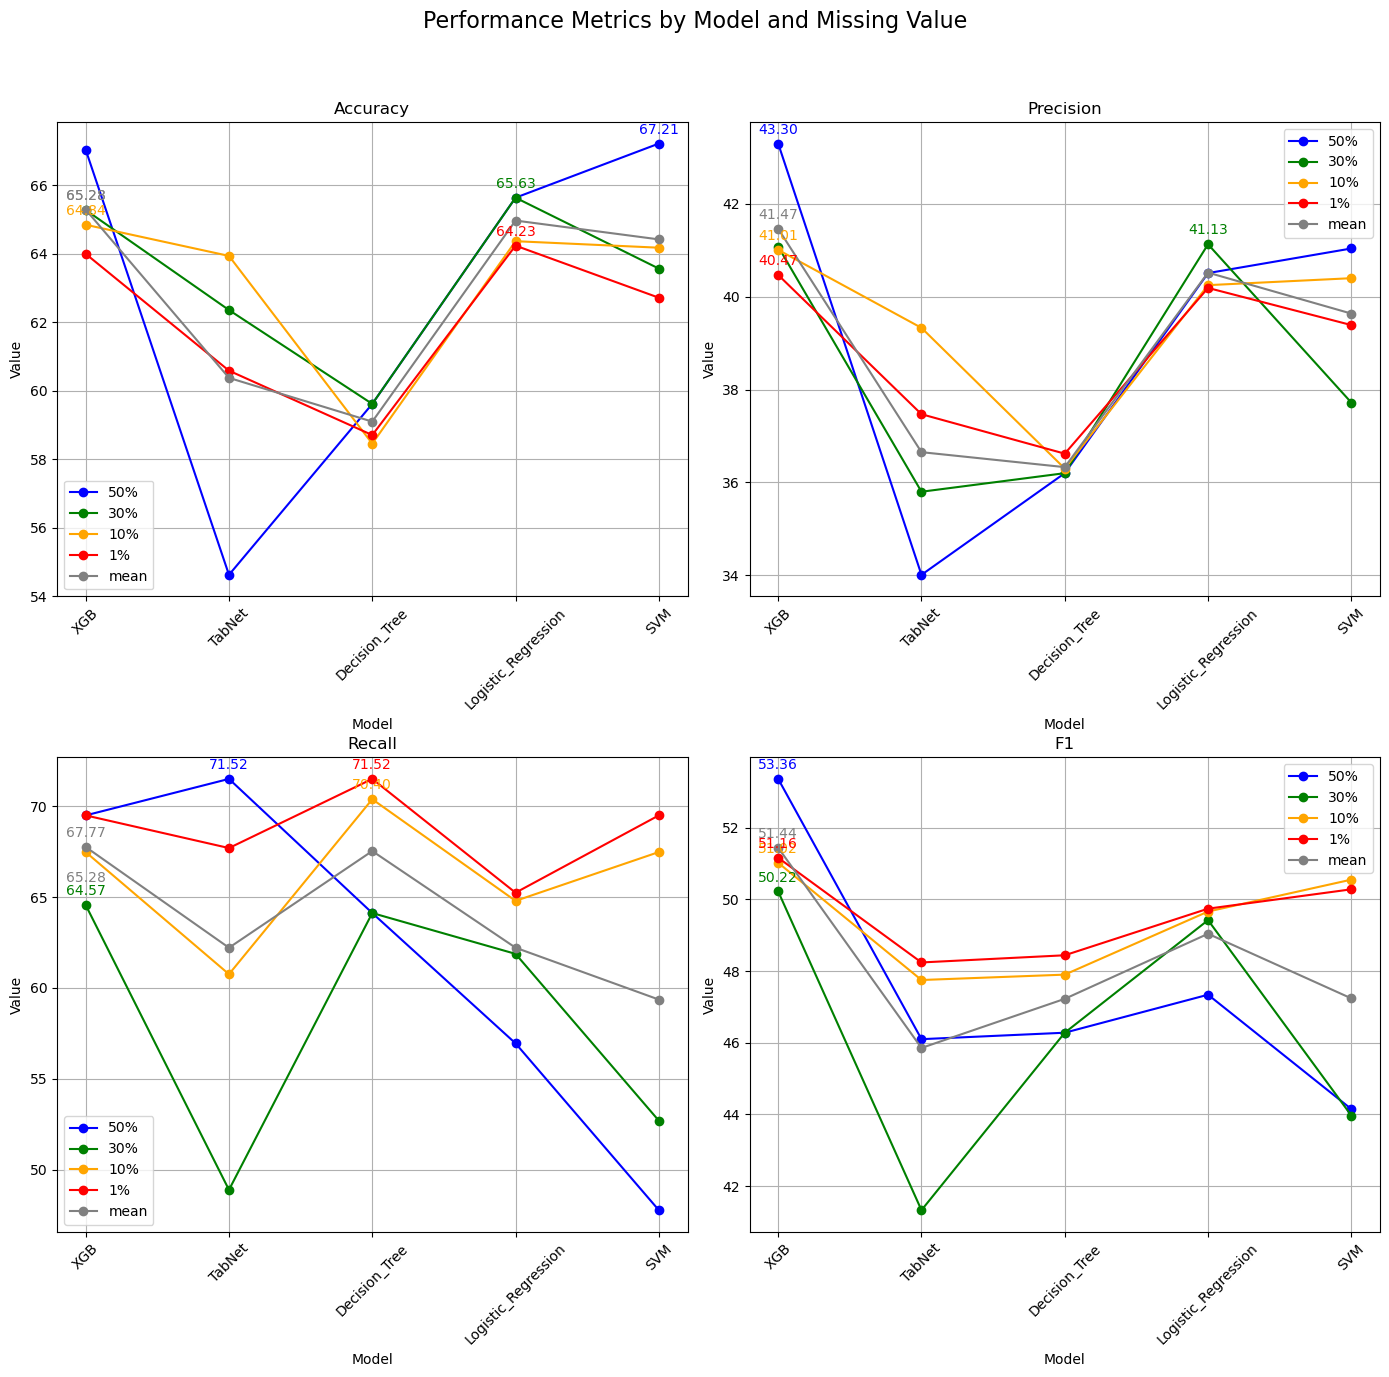

In [186]:
# 성능 지표 리스트
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# 그래프 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
fig.suptitle('Performance Metrics by Model and Missing Value', fontsize=16)

# Missing Value 별 색 지정
missing_colors = {'50%': 'blue', '30%': 'green', '10%': 'orange', '1%': 'red', 'mean': 'gray'}

# 색상 리스트 (노란색 제외)
mean_line_colors = ['blue', 'green', 'orange', 'red', 'gray']

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2

    ax = axes[row, col]

    for value in df['Missing_Value'].unique():
        subset = df[df['Missing_Value'] == value]
        max_value_idx = subset[metric].idxmax()
        max_value = subset[metric].max()
        max_model = subset.loc[max_value_idx, 'Model']
        
        color = missing_colors[value]
        # ax.plot(subset['Model'], subset[metric], marker='o', label=f"{value}", color=color)
        ax.plot(subset['Model'], subset[metric], marker='o', linestyle='-', label=f"{value}", color=color)
        ax.annotate(f"{max_value:.2f}", xy=(max_model, max_value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color=color)
    
    # 가장 높은 수치를 가지는 경우에 숫자와 해당 모델의 plot 색깔 적용
    max_mean_value_idx = mean_values.idxmax()
    max_mean_value = mean_values.max()
    max_mean_color = missing_colors[df_mean.loc[df_mean['Model'] == max_mean_value_idx, 'Missing_Value'].values[0]]
    ax.annotate(f"{max_mean_value:.2f}", xy=(max_mean_value_idx, max_mean_value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color=max_mean_color)
    
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel('Value')
    ax.set_xticklabels(df['Model'], rotation=45)
    ax.legend()
    ax.grid(True)

# 그래프 간 간격 조절
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# 그래프 보여주기
plt.show()

/tmp/ipykernel_312387/2161087526.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_312387/2161087526.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_312387/2161087526.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_312387/2161087526.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)


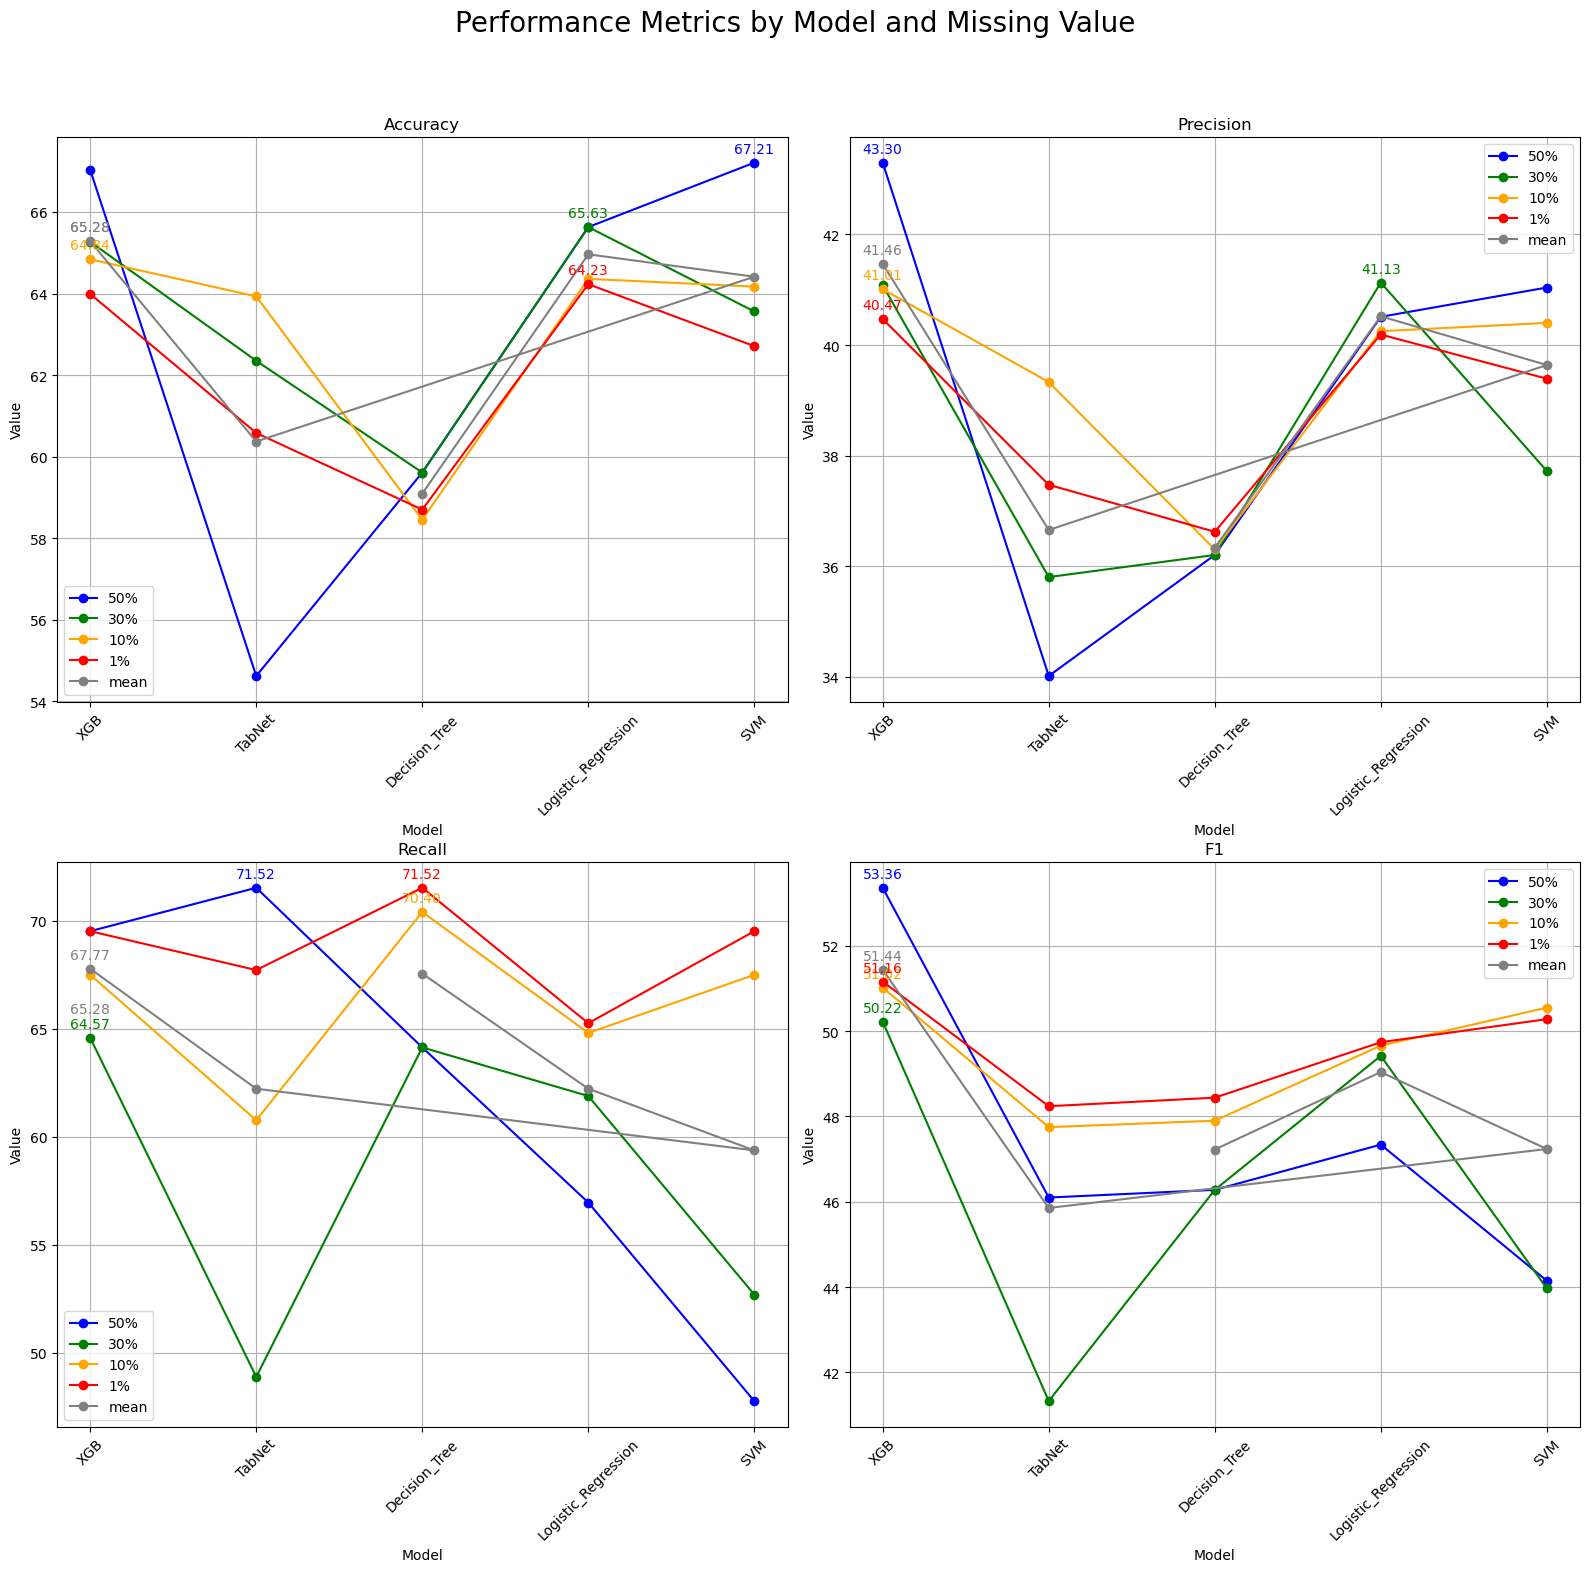

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 변환 (이전 코드와 동일)

# 성능 지표 리스트
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# 그래프 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
fig.suptitle('Performance Metrics by Model and Missing Value', fontsize=20)

# Missing Value 별 색 지정
missing_colors = {'50%': 'blue', '30%': 'green', '10%': 'orange', '1%': 'red', 'mean': 'gray'}

# 색상 리스트 (노란색 제외)
mean_line_colors = ['blue', 'green', 'orange', 'red', 'gray']

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2

    ax = axes[row, col]

    for value in df['Missing_Value'].unique():
        subset = df[df['Missing_Value'] == value]
        max_value_idx = subset[metric].idxmax()
        max_value = subset[metric].max()
        max_model = subset.loc[max_value_idx, 'Model']
        
        color = missing_colors[value]
        ax.plot(subset['Model'], subset[metric], marker='o', label=f"{value}", color=color)
        ax.annotate(f"{max_value:.2f}", xy=(max_model, max_value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color=color)
    
    # 가장 높은 수치를 가지는 경우에 숫자와 해당 모델의 plot 색깔 적용
    max_mean_value_idx = mean_values.idxmax()
    max_mean_value = mean_values.max()
    max_mean_color = missing_colors[df_mean.loc[df_mean['Model'] == max_mean_value_idx, 'Missing_Value'].values[0]]
    ax.annotate(f"{max_mean_value:.2f}", xy=(max_mean_value_idx, max_mean_value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color=max_mean_color)
    
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel('Value')
    ax.set_xticklabels(df['Model'], rotation=45)
    ax.legend()
    ax.grid(True)

    # mean_values를 사용하여 연결선 그리는 부분 제거

# 그래프 간 간격 조절
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# 그래프 보여주기
plt.show()
